1. Introduction
2. Dataset Overview
3. Class Imbalance Analysis
4. Train-Test Split
5. Baseline Model (Logistic Regression)
6. Random Forest Model
7. Model Comparison
8. Feature Importance



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.rename(columns = {'Time': 'time', 'Amount': 'amount', 'Class': 'class'},inplace = True)

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df['class'].value_counts()

class
0    284315
1       492
Name: count, dtype: int64

The dataset is highly imbalanced with very few fraud cases 

In [8]:
X = df.drop('class',axis = 1)
y = df['class']

In [9]:
from sklearn.model_selection import train_test_split #I used stratified sample for preserve class imbalance 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y )

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter  = 1000, class_weight = 'balanced')
model.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [11]:
y_pred_model = model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_model,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     55244
           1       0.92      0.05      0.10      1718

    accuracy                           0.97     56962
   macro avg       0.94      0.53      0.54     56962
weighted avg       0.97      0.97      0.96     56962



In [13]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100,
    random_state=42,
    class_weight='balanced')
model_rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [14]:
y_pred_rf = model_rf.predict(X_test)

In [15]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56886
           1       0.74      0.96      0.84        76

    accuracy                           1.00     56962
   macro avg       0.87      0.98      0.92     56962
weighted avg       1.00      1.00      1.00     56962



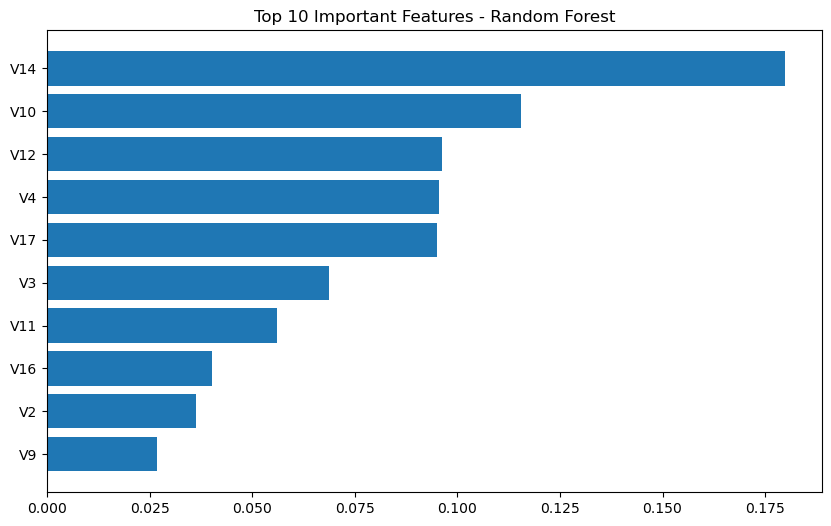

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance['Feature'][:10], importance['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features - Random Forest")
plt.show()
plt.savefig("C:/Users/Kajal Prajapati/Data-Science-Course/ML/feature_importance_plot.png")

In [17]:
import joblib

joblib.dump(model_rf, "credit_card_fraud_rf.pkl")

['credit_card_fraud_rf.pkl']